In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from gudhi import plot_persistence_diagram
from gudhi.datasets.generators import points

import matplotlib.pyplot as plt

from local_homology import compute_local_homology_alpha, compute_local_homology_r
from local_homology.dataset import intersecting_lines
from local_homology.r_filtration import plot_one_skeleton
from local_homology.vis import plot_point_cloud, plot_disc

In [3]:
np.random.seed(0)

## Local homology at the intersection of two segments

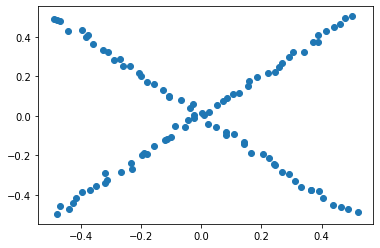

In [4]:
point_cloud = intersecting_lines(100, 0.01)
x0 = np.array([[0., 0.]])
epsilon = 0.2

plot_point_cloud(point_cloud)

### $\alpha$-filtration
We consider the points in the disc and we perform a Vietoris-Rips filtration by growing balls around those points, but also by expanding the boundary inwards.

*Observation: The proposed filtration is equivalent to covering the boundary of the disc with points and performing a Vietoris-Rips filtration.*

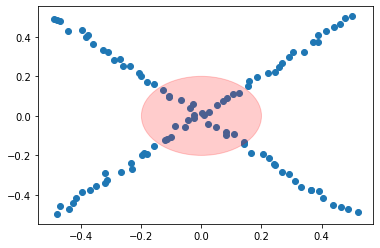

In [5]:
plot_point_cloud(point_cloud)
plot_disc(x0[0], epsilon, color="r", label=r"Neighborhood for $\alpha$-filtr")

usetex mode requires dvipng.


[(0.045958822731903055, 0.07809829260412735),
 (0.047794557460011704, 0.07737260756052006),
 (0.048700690200012095, 0.07559395112912769)]

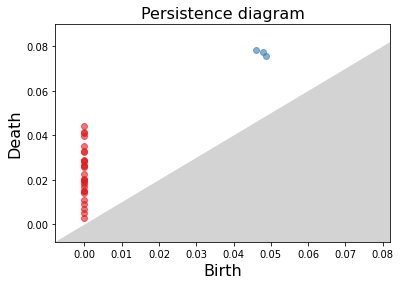

In [6]:
alpha_dgm = compute_local_homology_alpha(point_cloud, x0, epsilon, 2)
_ = plot_persistence_diagram(alpha_dgm)
alpha_dgm_1 = [(b, d)for dim, (b, d) in alpha_dgm if dim==1.]
alpha_dgm_1

We see indeed 3 prominent points in $H_1$, what corresponds to the 4 branches coming out from the center.

### $r$ filtration

We fix a Rips-scale $\alpha$ and we build the filtration by considering a smaller and smaller neighborhood around $x_0$.

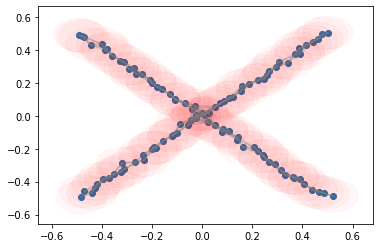

In [7]:
alpha = 0.1

plot_point_cloud(point_cloud)
for x in point_cloud:
    plot_disc(x, alpha, alpha=0.03, color="r", label="_nolegend_")
    # the keyword parameter alpha is the opacity of the circles, no the scale.
plot_one_skeleton(point_cloud, x0, alpha)

[(0.048812097741744664, 0.7108493404190814),
 (0.05766345748647772, 0.6918707286073918),
 (0.06629691053337627, 0.6940869005903981)]

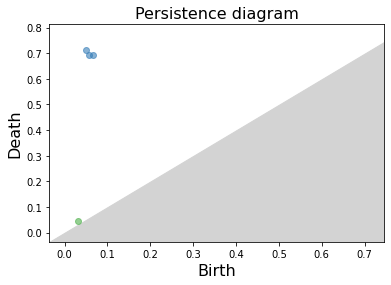

In [8]:
r_dgm = compute_local_homology_r(point_cloud, x0, alpha, 2)
_ = plot_persistence_diagram(r_dgm)
r_dgm_1 = [(b, d)for dim, (b, d) in r_dgm if dim==1.]
r_dgm_1

### Different center
For the chosen parameters, both methods show 3 persistent points, recovering the correct local homology. Let's pick two points where local homology is different.

First, the point $x_1 = (-0.25, -0.25)$, where the local homology group in dimension 1 has one generator and groups in all other dimensions are trivial. The point $x_2 = (-0.4, 0.)$ is an outlier and there is no point in `point_cloud` which is close to it (even though there are some points in its $\epsilon$-neighborhood).

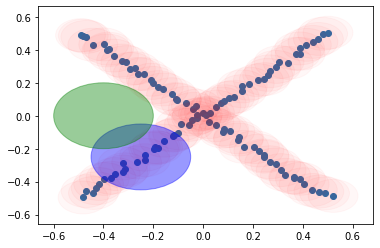

In [9]:
x1, x2 = np.array([[-0.25, -0.25]]), np.array([[-0.4, 0.0]])

plot_point_cloud(point_cloud)
for x in point_cloud:
    plot_disc(x, alpha, alpha=0.03, color="r", label="_nolegend_")

for x, color in zip([x1, x2], ["blue", "green"]):
    plot_disc(x[0], epsilon, alpha=0.4, color=color)

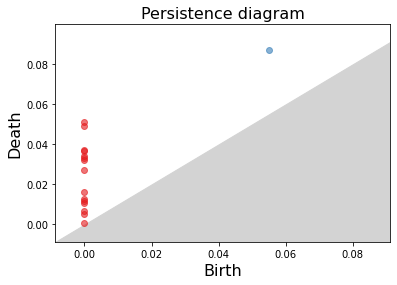

In [10]:
# For x = (-0.25, -0.25)
x = x1

alpha_dgm1 = compute_local_homology_alpha(point_cloud, x, epsilon, 2)
_ = plot_persistence_diagram(alpha_dgm1)

There is one (persistent) point in $H_1$, as expected.

[(1, (0.35639592671338705, 0.807101288045817)),
 (1, (0.3788204251646635, 0.777978909816678)),
 (1, (0.02637338134976397, 0.3383875778975901))]

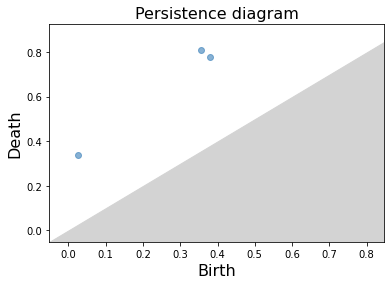

In [11]:
r_dgm1 = compute_local_homology_r(point_cloud, x, alpha, 2)
plot_persistence_diagram(r_dgm1)
r_dgm1

This diagram is more interesting. Remember that we are quotienting by everything but a smaller and smaller neighborhood.

There are three points in total. Two appear, and die, for high parameter values, namely $[0.38, 075]$ is an interval where they both persist. In this particular example, we should be able to see them for $r= 0.6$. Visual inspection confirms that the $r$-ball contains the intersection of lines and so that the points correspond to things happening "far" from the localization point.

The point closer to the origin persists through $(0.03, 0.33)$. Let's inspect $r=0.2$. We see that we recover the correct homology in that interval.

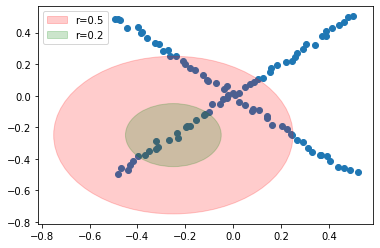

In [12]:
plot_point_cloud(point_cloud)
plot_disc(x[0], 0.5, color="red", label="r=0.5")
plot_disc(x[0], 0.2, color="green", label="r=0.2")
plt.legend()

An interesting question is what happens when we place the point closer to the intersection point, so that the bottom-left endpoint of the segment is outside of the ball while the intersection is still inside. Let us examine that situation for both filtrations.

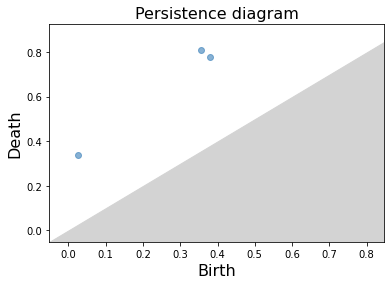

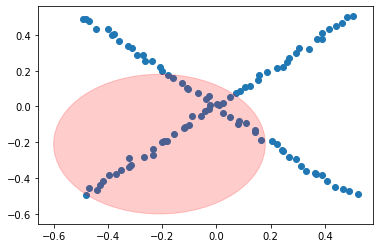

In [13]:
x = np.array([[-0.21, -0.21]])
r_dgm2 = compute_local_homology_r(point_cloud, x, alpha, 2)
plot_persistence_diagram(r_dgm1)

plt.figure()
plot_point_cloud(point_cloud)
plot_disc(x[0], 0.39, color="red", label="r=0.5")

In [14]:
r_dgm1

[(1, (0.35639592671338705, 0.807101288045817)),
 (1, (0.3788204251646635, 0.777978909816678)),
 (1, (0.02637338134976397, 0.3383875778975901))]

For the $r-$filtration, it does not change much. We have the same number of points, but now, all bars live through (an interval that includes) $[0.33, 0.39]$.

For the $\alpha$-filtration, it does not change anything, since the intersection point is not in the $\epsilon$-ball. of the center $(0,0)\notin B(x, \epsilon)$.

## Densely sampled square

In [15]:
np.random.seed(2)

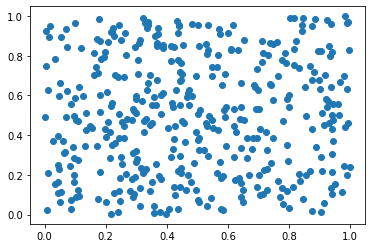

In [16]:
point_cloud = np.random.rand(400, 2)

plot_point_cloud(point_cloud)

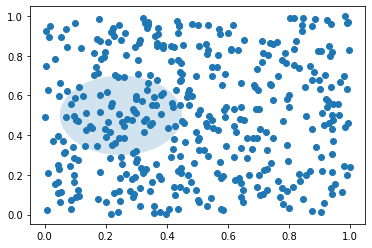

In [17]:
x0 = np.array([[0.25, 0.5]])
epsilon = 0.2

plot_point_cloud(point_cloud)
plot_disc(x0[0], epsilon)

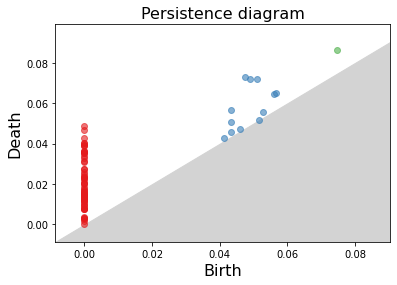

In [18]:
alpha_square = compute_local_homology_alpha(point_cloud, x0, epsilon, 2)
_ = plot_persistence_diagram(alpha_square)

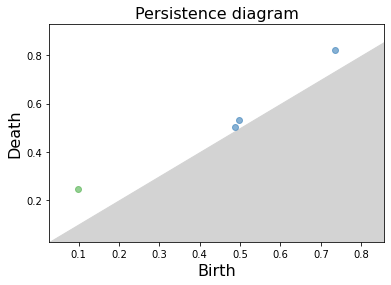

In [19]:
alpha = 0.2
r_square = compute_local_homology_r(point_cloud, x0, alpha, 2)
_ = plot_persistence_diagram(r_square)

Both diagrams show some $H_2$, but it's not very persistent.

## Sphere

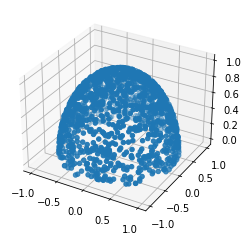

In [20]:
point_cloud = points.sphere(n_samples=3000, ambient_dim=3, radius=1, sample="random")

point_cloud = point_cloud[point_cloud[:,2]>=0.0]
ax = plt.axes(projection='3d')
_ = ax.scatter3D(point_cloud[:,0], point_cloud[:, 1], point_cloud[:, 2],)

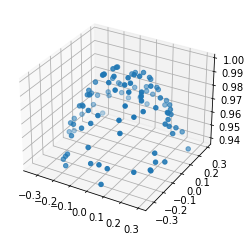

In [21]:
x0 = np.array([[0., 0., 1.]])
epsilon = 0.35

from local_homology.alpha_filtration import is_point_in_ball
in_ball, distance_to_boundary = is_point_in_ball(point_cloud, x0, epsilon, return_distances=True)

pts_in_ball = point_cloud[in_ball]
ax = plt.axes(projection='3d')
_ = ax.scatter3D(pts_in_ball[:,0], pts_in_ball[:, 1], pts_in_ball[:, 2],)

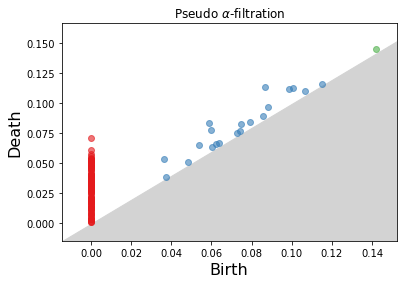

In [22]:
alpha_sphere = compute_local_homology_alpha(point_cloud, x0, epsilon, 2, expand_boundary=True)
_ = plot_persistence_diagram(alpha_sphere)
_ = plt.title(r"Pseudo $\alpha$-filtration")

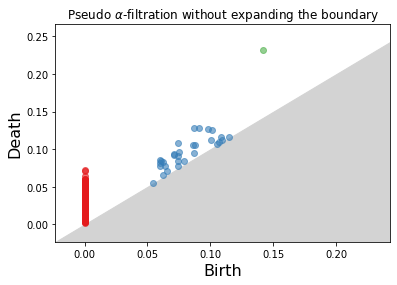

In [23]:
alpha_sphere = compute_local_homology_alpha(point_cloud, x0, epsilon, 2, expand_boundary=False)
_ = plot_persistence_diagram(alpha_sphere)
_ = plt.title(r"Pseudo $\alpha$-filtration without expanding the boundary")

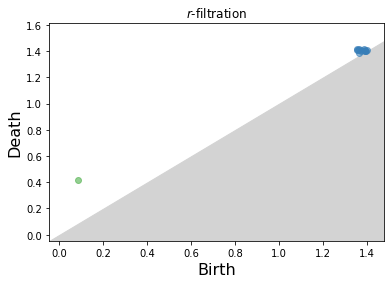

In [24]:
alpha = 0.2

r_sphere = compute_local_homology_r(point_cloud, x0, alpha, 2)
_ = plot_persistence_diagram(r_sphere)
_ = plt.title(r"$r$-filtration")

For the $\alpha$-filtration, the expanding boundary seems to fill out the interior too quickly for $H_2$ to appear. Indeed, if we disable this behavior, we observe a non-trivial $2$-dim hole. This shows that the expanding boundary behavior might be capturing something else than the local homology.

For the $r-$filtration, this appears immediately, and stays quite long. Of course, this is due to a good scale choice for Rips.